In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import GreenShield_exp
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
data_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader")
train_data = pd.read_csv(data_path / "traffic_data_luzern_train.csv")
val_data = pd.read_csv(data_path / "traffic_data_luzern_val.csv")
test_data = pd.read_csv(data_path / "traffic_data_luzern_test.csv")

In [5]:
train_data.drop(train_data[train_data["speed"] == 0.0].index, inplace=True)
train_data.drop(train_data[train_data["density"] == 0.0].index, inplace=True)
train_data.drop(train_data[train_data["flow"] == 0.0].index, inplace=True)
train_data.drop(train_data[train_data["rainfall"] == 0.0].index, inplace=True)

In [6]:
train_data

,Unnamed: 0,day,interval,flow,occ,density,speed,rainfall
4,584,2015-01-25,30690.0,148.0,0.000025,0.000096,1.543410e+06,0.495
8,718,2015-01-30,81090.0,279.0,0.000040,0.000153,1.825238e+06,0.012
10,679,2015-01-29,27090.0,857.0,0.000207,0.000785,1.091482e+06,1.791
14,322,2015-01-14,37890.0,611.0,0.000103,0.000393,1.554469e+06,0.519
25,705,2015-01-30,34290.0,588.0,0.000103,0.000393,1.495953e+06,0.088
...,...,...,...,...,...,...,...,...
1112,385,2015-01-17,5490.0,128.0,0.000014,0.000054,2.365245e+06,0.635
1116,1332,2015-02-25,45090.0,736.0,0.000121,0.000460,1.598369e+06,0.002
1122,330,2015-01-14,66690.0,847.0,0.000137,0.000521,1.624996e+06,0.014
1124,466,2015-01-20,37890.0,629.0,0.000106,0.000403,1.562521e+06,0.083


In [8]:
# k_j_data = [max(train_data["density"]) for i in range(len(train_data))]

u_data = train_data["speed"].values
r_data = train_data["rainfall"].values
q_data = train_data["flow"].values

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


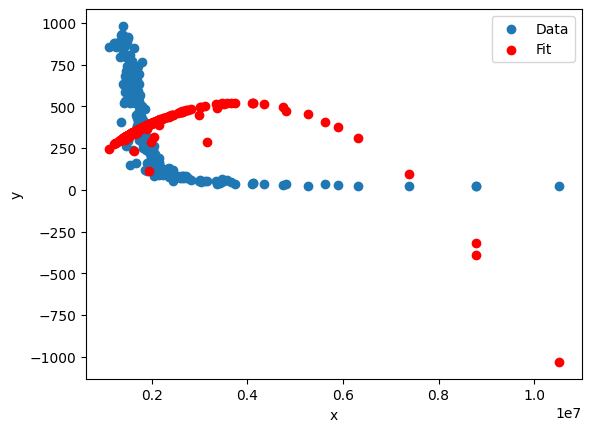

Fitted Parameters:
a = 0.024238770726027623  ===  b = 3.0908504203217113  ===  c = 15.862031893932803 === k_j = 0.0002697355461480115
____________________________________________________
Error Parameters:
R2 = -0.43060579503227814  ===  MSE = 104158.70684099717


In [9]:
model = GreenShield_exp.GreenShield_EXP(None, u_data, r_data, q_data)
model.fit([0.5, 0.5, 0.5, 0.5])
model.plot()
model.error()
model.get_results()
